<a href="https://colab.research.google.com/github/pritika-vig/MLHC-AgentBasedROI/blob/main/notebooks/practice_access_camelyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required tools
!apt-get update
!apt-get install -y openslide-tools
!pip install openslide-python
!pip install awscli --quiet

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,049 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,538 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-update

Verify you are connecting to the public AWS bucket correctly. Running the following code snippet should produce:
                           PRE CAMELYON16/
                           PRE CAMELYON17/

In [4]:
!aws s3 ls --no-sign-request s3://camelyon-dataset/CAMELYON16/


                           PRE annotations/
                           PRE background_tissue/
                           PRE evaluation/
                           PRE images/
                           PRE masks/
2022-09-28 09:15:16          0 
2022-09-28 09:16:24       3642 README.md
2022-09-28 09:16:56      55360 checksums.md5
2022-09-28 12:27:44       7260 license.txt
2022-09-28 12:32:09        407 pathology-tissue-background-segmentation.json


In [8]:
import os

# Create folders
os.makedirs("/content/wsis", exist_ok=True)
os.makedirs("/content/annotations", exist_ok=True)

# Inspect the annotations and images:
!aws s3 ls --no-sign-request s3://camelyon-dataset/CAMELYON16/images/ | head
!aws s3 ls --no-sign-request s3://camelyon-dataset/CAMELYON16/annotations/ | head


2022-09-28 09:16:24     281405 test_001.xml
2022-09-28 09:16:24     586898 test_002.xml
2022-09-28 09:16:24       8709 test_004.xml
2022-09-28 09:16:24      14887 test_008.xml
2022-09-28 09:16:24       2455 test_010.xml
2022-09-28 09:16:24       7889 test_011.xml
2022-09-28 09:16:24       2847 test_013.xml
2022-09-28 09:16:24     725503 test_016.xml
2022-09-28 09:16:24    3815613 test_021.xml
2022-09-28 09:16:25     887303 test_026.xml

[Errno 32] Broken pipe
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe


download: s3://camelyon-dataset/CAMELYON16/images/normal_001.tif to wsis/normal_001.tif
download: s3://camelyon-dataset/CAMELYON16/annotations/test_001.xml to annotations/test_001.xml


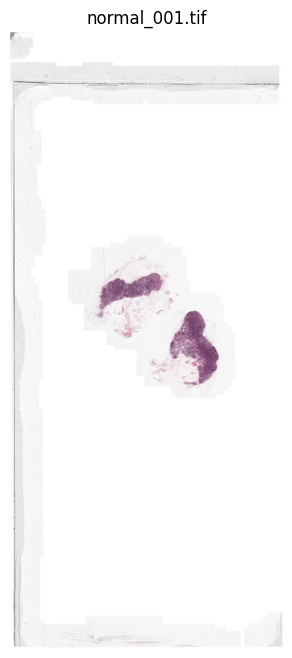

In [10]:
# Update file names based on actual contents
image_name = "normal_001.tif"
annotation_name = "test_001.xml"

# Download image
!aws s3 cp --no-sign-request s3://camelyon-dataset/CAMELYON16/images/{image_name} /content/wsis/

# Download annotation
!aws s3 cp --no-sign-request s3://camelyon-dataset/CAMELYON16/annotations/{annotation_name} /content/annotations/

import openslide
import matplotlib.pyplot as plt

slide_path = f"/content/wsis/{image_name}"

# Open slide and generate thumbnail
slide = openslide.OpenSlide(slide_path)
thumb = slide.get_thumbnail((1024, 1024))

plt.figure(figsize=(8, 8))
plt.imshow(thumb)
plt.axis("off")
plt.title(image_name)
plt.show()